In [96]:
import np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
s = np.ones(6)
ds = np.ones(6)/1000
s + 1j * ds

array([1.+0.001j, 1.+0.001j, 1.+0.001j, 1.+0.001j, 1.+0.001j, 1.+0.001j])

In [27]:
r = np.full((2,3), [0.04143, 0.02875, 0.02023]).T.flatten()
dr = np.full(6, 0.00003)
r + 1j * dr

array([0.04143+3.e-05j, 0.04143+3.e-05j, 0.02875+3.e-05j, 0.02875+3.e-05j,
       0.02023+3.e-05j, 0.02023+3.e-05j])

In [28]:
m = np.full((3,2), [0.05,0.1]).flatten()
dm = np.full(6, 0.001)
m + 1j * dm

array([0.05+0.001j, 0.1 +0.001j, 0.05+0.001j, 0.1 +0.001j, 0.05+0.001j,
       0.1 +0.001j])

In [29]:
ts = np.m[
    9.91, 9.68:
    :6.28, 6.25:
    :14.22, 14.12:
    :8.94, 8.47:
    :22.97,23.03:
    :12.28, 12.84
]
dts = np.full((6,2), 0.01)
ts + 1j * dts

array([[ 9.91+0.01j,  9.68+0.01j],
       [ 6.28+0.01j,  6.25+0.01j],
       [14.22+0.01j, 14.12+0.01j],
       [ 8.94+0.01j,  8.47+0.01j],
       [22.97+0.01j, 23.03+0.01j],
       [12.28+0.01j, 12.84+0.01j]])

In [81]:
def roundOff(x, n):
    rem = x % 10**float(-n)
    if np.round(rem*10**(n+1),1) < 5:
        return x - rem
    else: return x + (10**float(-n) - rem)

rounds = np.vectorize(roundOff)

t = rounds(np.mean(ts, axis=1), 2)
dt = np.mean(dts, axis=1)
t+ 1j * dt

array([ 9.8 +0.01j,  6.27+0.01j, 14.17+0.01j,  8.71+0.01j, 23.  +0.01j,
       12.56+0.01j])

In [83]:
a = rounds(2*s/(t**2), 4)
a

array([0.0208, 0.0509, 0.01  , 0.0264, 0.0038, 0.0127])

In [86]:
da = rounds(2*ds/(t**2) + 4*s*dt/(t**3), 4)
da

array([0.0001, 0.0002, 0.    , 0.0001, 0.    , 0.    ])

In [88]:
a_r = rounds(a/r, 3)
a_r

array([0.502, 1.229, 0.348, 0.918, 0.188, 0.628])

In [90]:
da_r = rounds(da/r + (a*dr)/(r**2), 3)
da_r

array([0.003, 0.006, 0.   , 0.004, 0.   , 0.001])

In [92]:
g = 9.781
mrg_a = rounds(m*r*(g-a), 4)
mrg_a

array([0.0202, 0.0403, 0.014 , 0.028 , 0.0099, 0.0198])

In [149]:
dmrg_a = rounds(r*dm*(g-a) + m*dr*(g-a) + m*r*da*(g/a - 1)
dmrg_a

array([0.0005, 0.0005, 0.0003, 0.0003, 0.0002, 0.0002])

<ErrorbarContainer object of 3 artists>

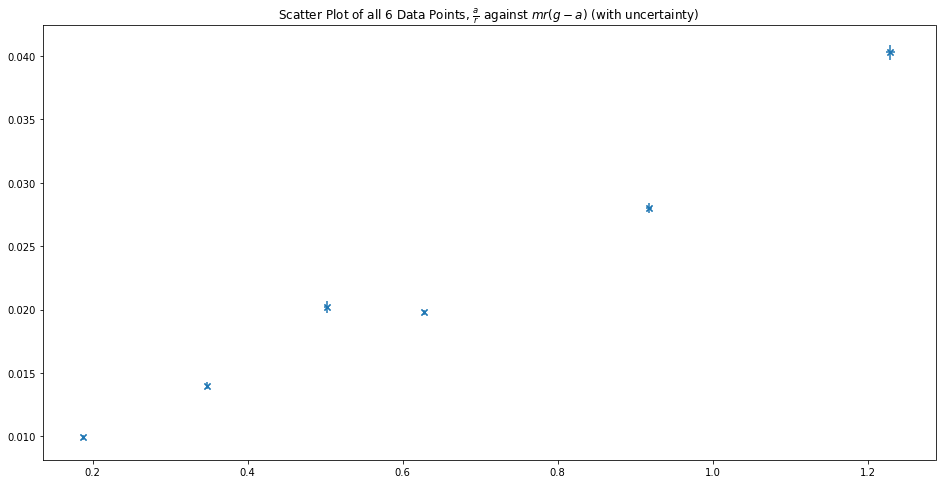

In [138]:
plt.figure(figsize=(16, 8))
plt.title("Scatter Plot of all 6 Data Points, $\\frac{a}{r}$ against $mr(g-a)$ (with uncertainty)")
plt.scatter(a_r,mrg_a, marker="x")
plt.errorbar(a_r, mrg_a, yerr=dmrg_a, xerr=da_r, fmt="x")

In [107]:
m, c = np.polyfit(a_r, mrg_a, 1)
xrange = np.linspace(0.1, 1.3, 1000)
yrange = m*xrange+c
m, c

(0.02801104471033562, 0.0042323144199150516)

Text(0.2, 0.035, '$I = m = \\frac{y_2-y_1}{x_2-x_1} = \\frac{0.0300-0.0210}{0.920-0.600} = 0.028125 \\approx 0.0281$\n$\\tau_{frictional} = c = y - mx = 0.0300 - 0.920 \\times 0.028125 = 0.004125 \\approx 0.00413$')

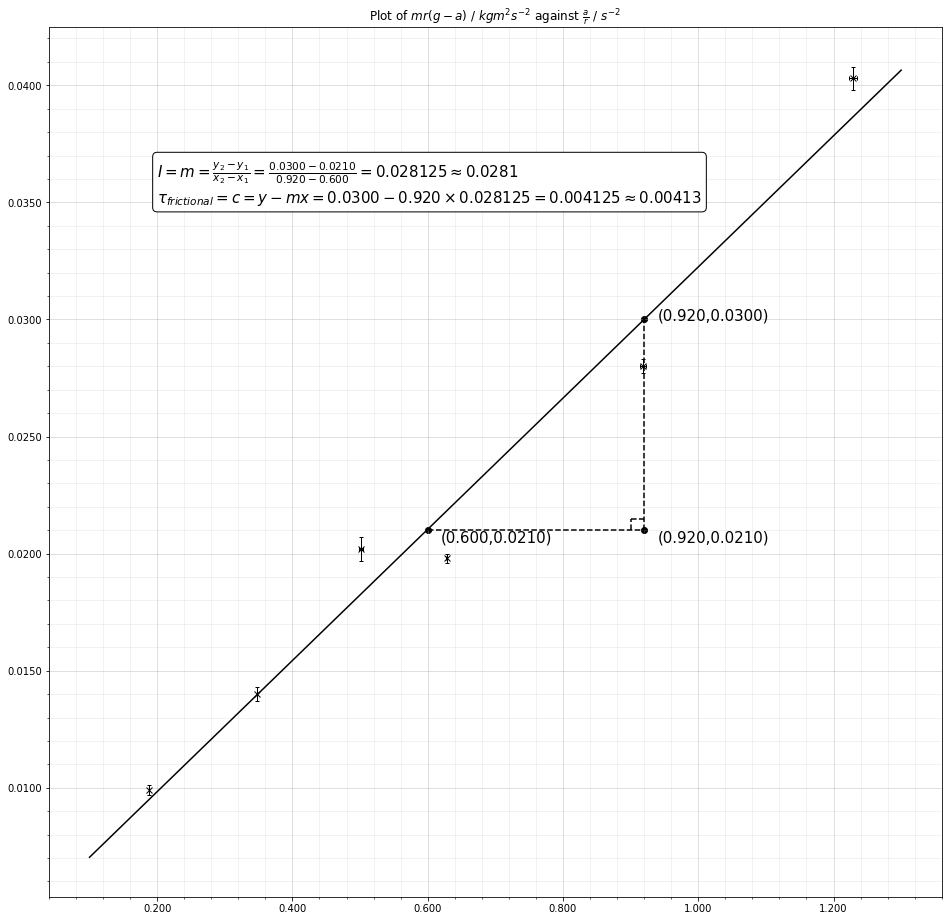

In [243]:
from matplotlib.ticker import FormatStrFormatter

fig,ax = plt.subplots(1,1,figsize=(16,16))

#plt.figure(figsize=(16, 8))
ax.set_title("Plot of $mr(g-a)$ / $kgm^2s^{-2}$ against $\\frac{a}{r}$ / $s^{-2}$")
#plt.scatter(a_r,mrg_a,marker='x')
ax.errorbar(a_r, mrg_a, yerr=dmrg_a, xerr=da_r, fmt="x",
    capsize=2, 
    elinewidth=1,
    markeredgewidth=1, color="black")
ax.plot(xrange, yrange, color="black")

# Major ticks every 20, minor ticks every 5
majorx_ticks = np.arange(0, 1.41, 0.2)
minorx_ticks = np.arange(0, 1.41, 0.04)
majory_ticks = np.arange(0.005, 0.045, 0.005)
minory_ticks = np.arange(0.005, 0.045, 0.001)
ax.set_xticks(majorx_ticks)
ax.set_xticks(minorx_ticks, minor=True)
ax.set_yticks(majory_ticks)
ax.set_yticks(minory_ticks, minor=True)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

s2, s1 = [0.92, 0.03],[0.6,0.021]

ax.scatter([s1[0],s2[0],s2[0]], [s1[1],s2[1],s1[1]], color="black")
ax.plot(np.full(100,s2[0]),np.linspace(s1[1],s2[1], 100), linestyle="--", color="black")
ax.plot(np.linspace(s1[0],s2[0], 100),np.full(100,s1[1]), linestyle="--", color="black")
ax.plot(np.full(100,s2[0]-0.02),np.linspace(s1[1],s1[1]+0.0005, 100), linestyle="--", color="black")
ax.plot(np.linspace(s2[0]-0.02,s2[0], 100),np.full(100,s1[1]+0.0005), linestyle="--", color="black")

ax.annotate(f"({s2[0]:.3f},{s1[1]:.4f})", (s2[0]+0.02, s1[1]-0.0005), fontsize=15)
ax.annotate(f"({s2[0]:.3f},{s2[1]:.4f})", (s2[0]+0.02, s2[1]), fontsize=15)
ax.annotate(f"({s1[0]:.3f},{s1[1]:.4f})", (s1[0]+0.02, s1[1]-0.0005), fontsize=15)

ax.annotate("$I = m = \\frac{y_2-y_1}{x_2-x_1} = \\frac{0.0300-0.0210}{0.920-0.600} = 0.028125 \\approx 0.0281$\n$\\tau_{frictional} = c = y - mx = 0.0300 - 0.920 \\times 0.028125 = 0.004125 \\approx 0.00413$", (0.2,0.035), fontsize=15,
                  bbox=dict(boxstyle="round", fc="w"))


<AxesSubplot:title={'center':'Scatter Plot of all 6 Data Points, $\\frac{a}{r}$ against $mr(g-a)$'}>

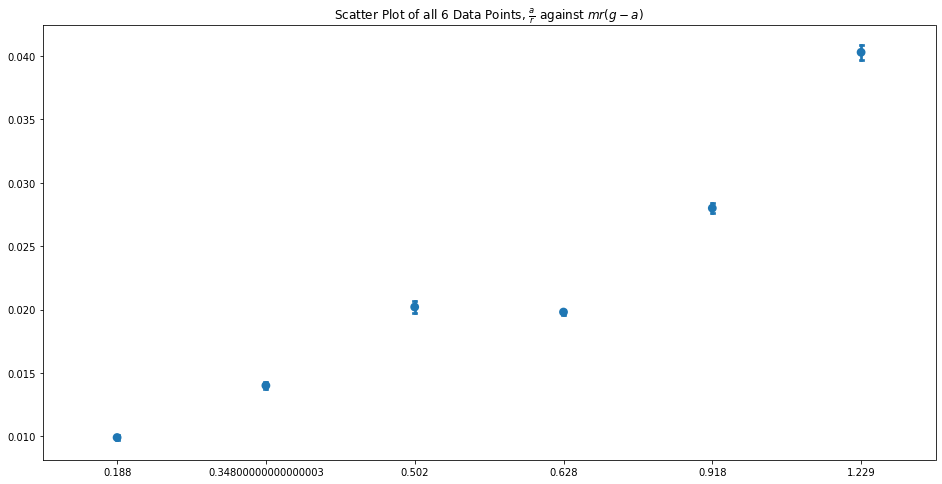

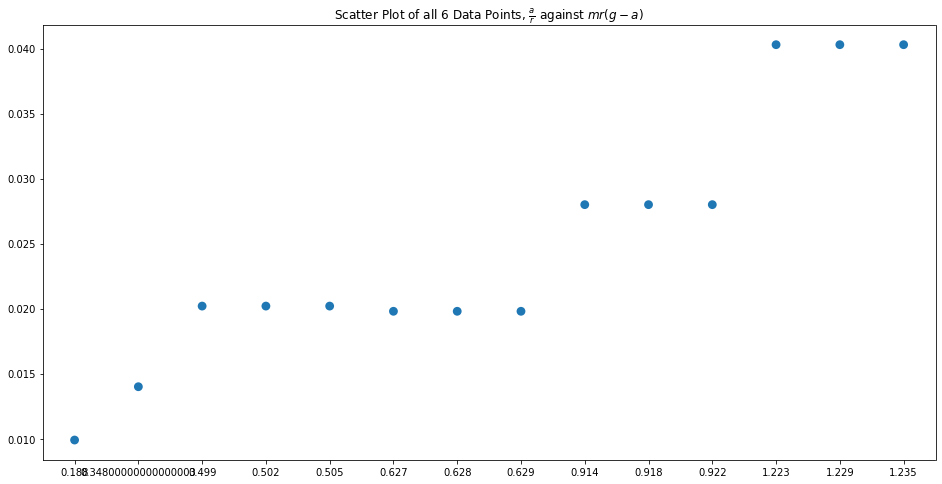

In [133]:
plt.figure(figsize=(16, 8))
plt.title("Scatter Plot of all 6 Data Points, $\\frac{a}{r}$ against $mr(g-a)$")
ax = sns.pointplot(np.hstack((a_r, a_r, a_r)),np.hstack((mrg_a-dmrg_a, mrg_a+dmrg_a, mrg_a)), capsize=.02, join=False)
plt.figure(figsize=(16, 8))
plt.title("Scatter Plot of all 6 Data Points, $\\frac{a}{r}$ against $mr(g-a)$")
sns.pointplot(np.hstack((a_r-da_r, a_r, a_r+da_r)),np.hstack((mrg_a, mrg_a, mrg_a)), capsize=.02, join=False, orient="v")

In [165]:
sorted([[round(i,5) for i in j] for j in np.vstack((a_r, da_r, mrg_a, dmrg_a)).T.tolist()],key=lambda x:x[0])

[[0.188, 0.0, 0.0099, 0.0002],
 [0.348, 0.0, 0.014, 0.0003],
 [0.502, 0.003, 0.0202, 0.0005],
 [0.628, 0.001, 0.0198, 0.0002],
 [0.918, 0.004, 0.028, 0.0003],
 [1.229, 0.006, 0.0403, 0.0005]]